# Set Up

In [37]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import os

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

plt.rcParams.update({'figure.max_open_warning': 0})

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# Dataset

In [10]:
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# Number of Respondents to the Survey
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)



Contents of initial survey data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [11]:
# first five rows of the data frame
pd.DataFrame.head(valid_survey_input)

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [12]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

# Exploratory Data Analysis

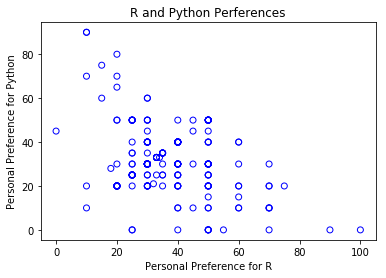

In [13]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


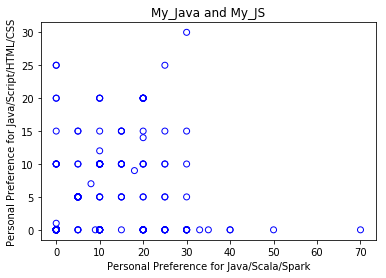

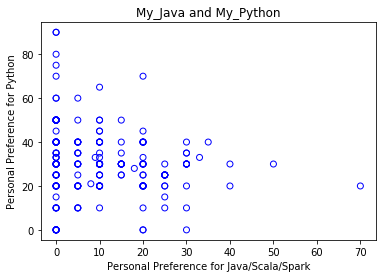

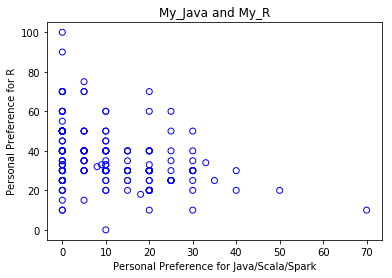

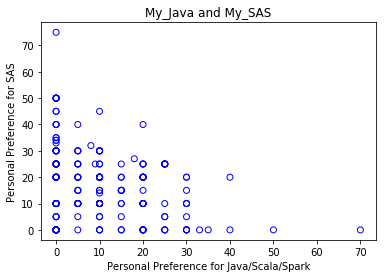

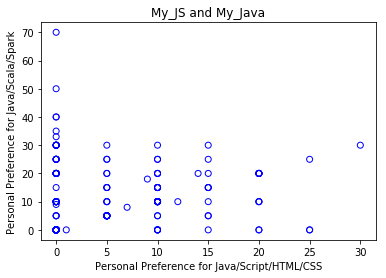

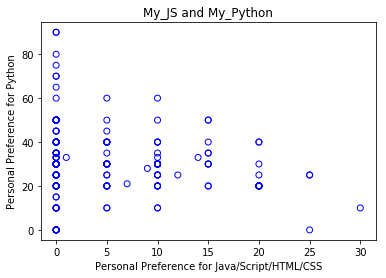

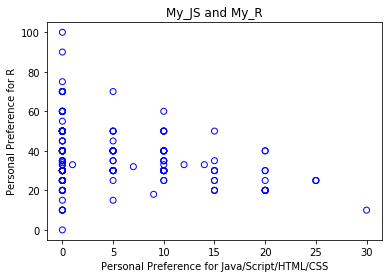

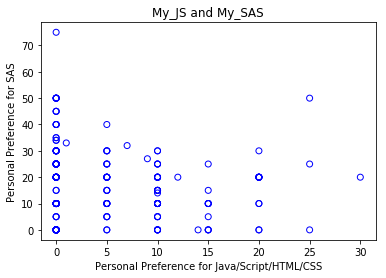

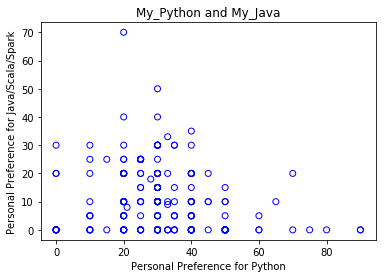

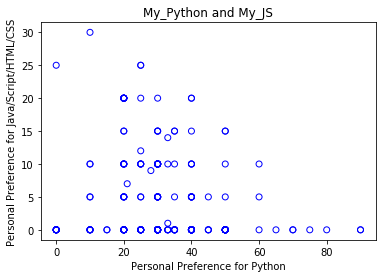

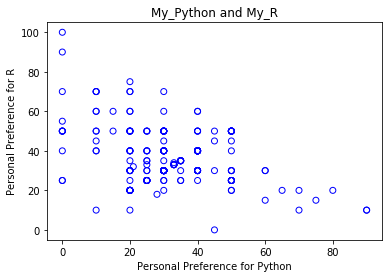

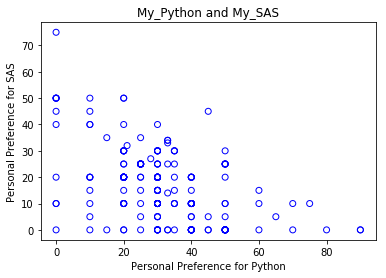

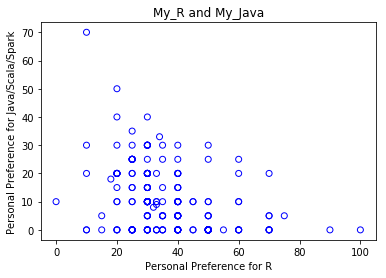

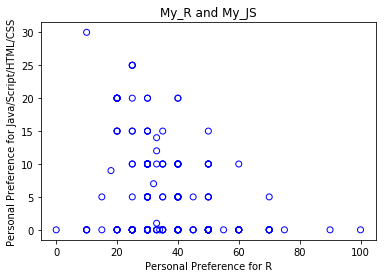

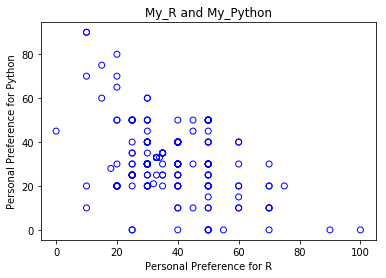

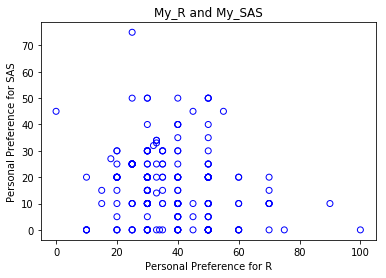

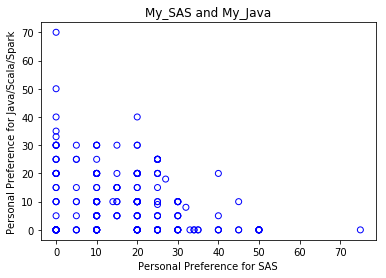

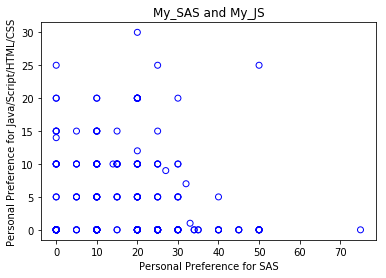

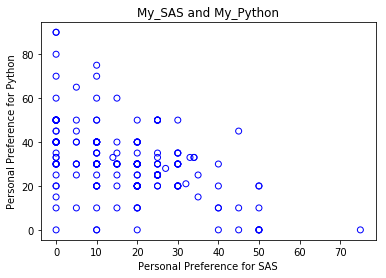

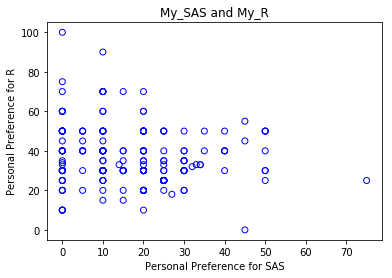

In [14]:
# create a list of labels for axes
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
 

<Figure size 432x288 with 0 Axes>

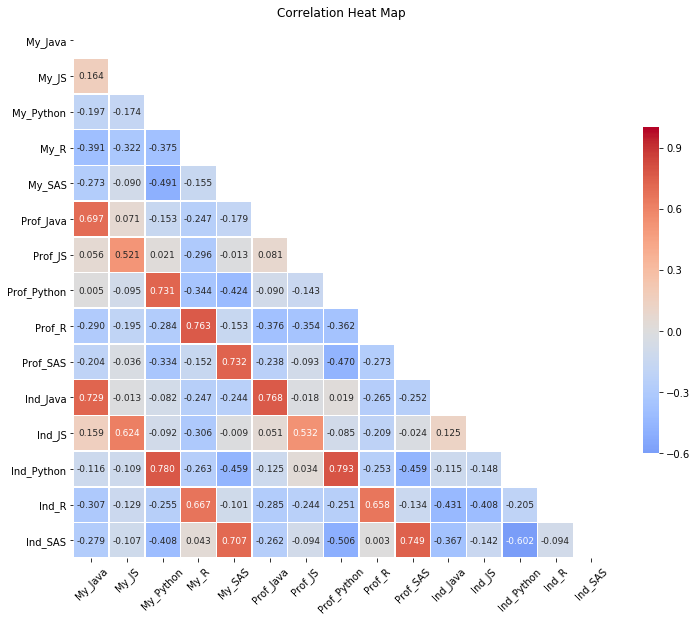

In [15]:
# correlation matrix/heat map to examine intercorrelations among software preference variables
corr_chart(df_corr = software_df) 


In [16]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
software_df.describe()



Descriptive statistics for survey data ---------------


,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


In [17]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())



Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [18]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

# determines the shape after eliminating missing data codes
X.shape
 

(187,)

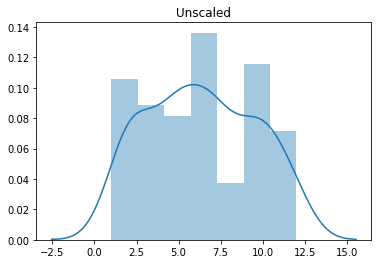

In [38]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

#Transformation - Unscaled
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


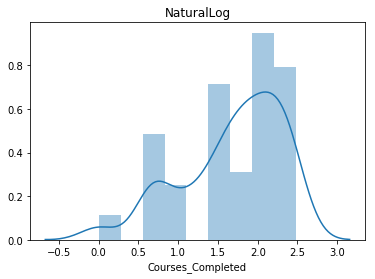

In [20]:
#Transformation - Natural Log
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


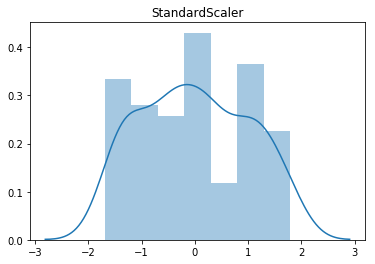

In [39]:
# Transformation - Standard Scaler
X=np.array(X).reshape(-1,1)
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


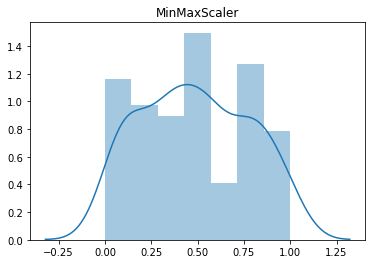

In [40]:
# Transformation - MinMaxScaler
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 


In [23]:
# Segment the data into Professional, Industry, and Personal

professional = survey_df.filter(like='Prof')
industry = survey_df.filter(like='Ind')
personal = survey_df.filter(like='My')

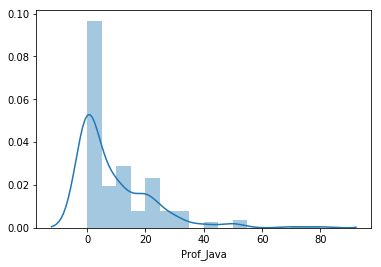

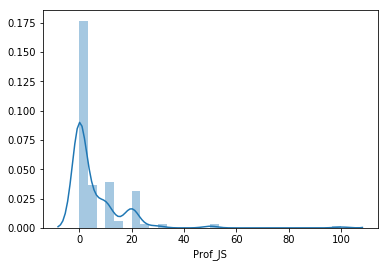

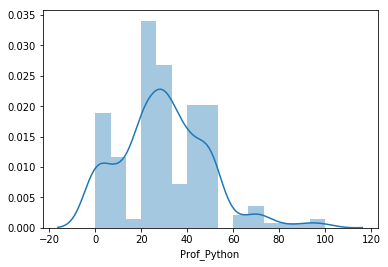

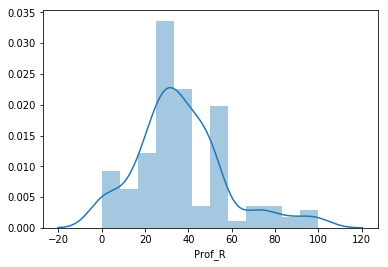

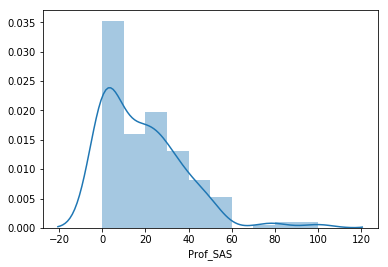

In [24]:
# Show Language Preference Histograms by Professional

for i, col in enumerate(professional.columns):
    plt.figure(i)
    sns.distplot(professional[col])

plt.savefig('Language_Histograms.pdf')

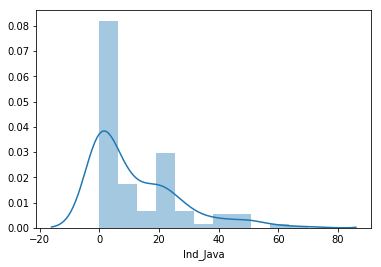

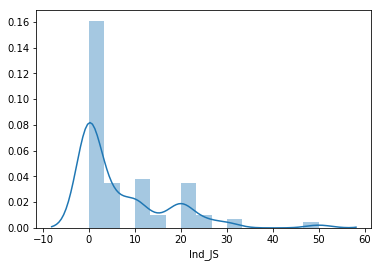

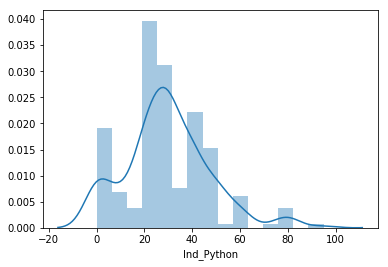

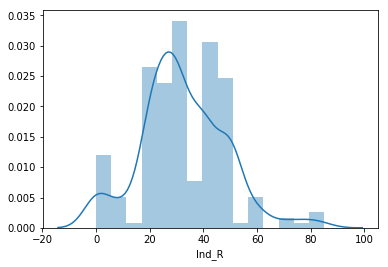

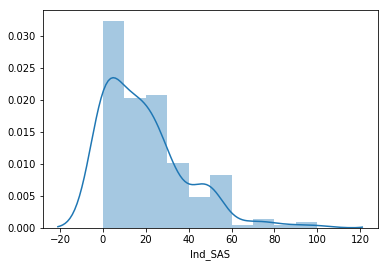

In [25]:
# Show Language Preference Histograms  by Industry

for i, col in enumerate(industry.columns):
    plt.figure(i)
    sns.distplot(industry[col])
    plt.show()

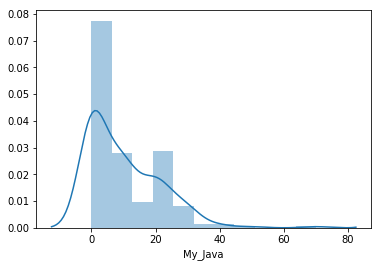

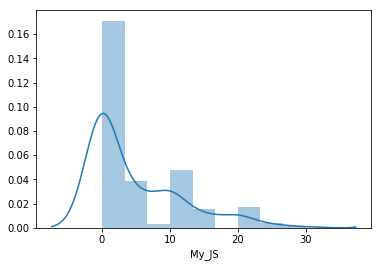

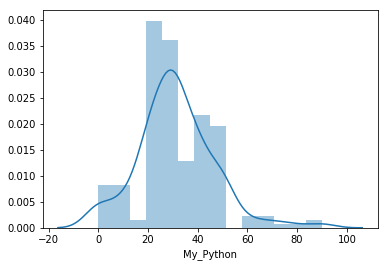

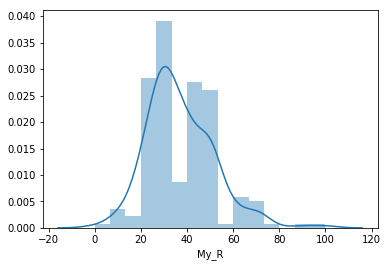

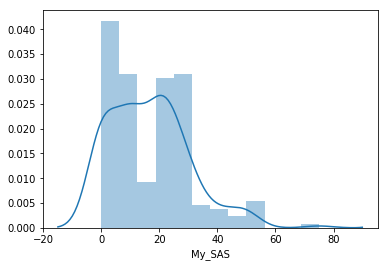

In [26]:
# Show Language Preference Histograms by Personal

for i, col in enumerate(personal.columns):
    plt.figure(i)
    sns.distplot(personal[col])


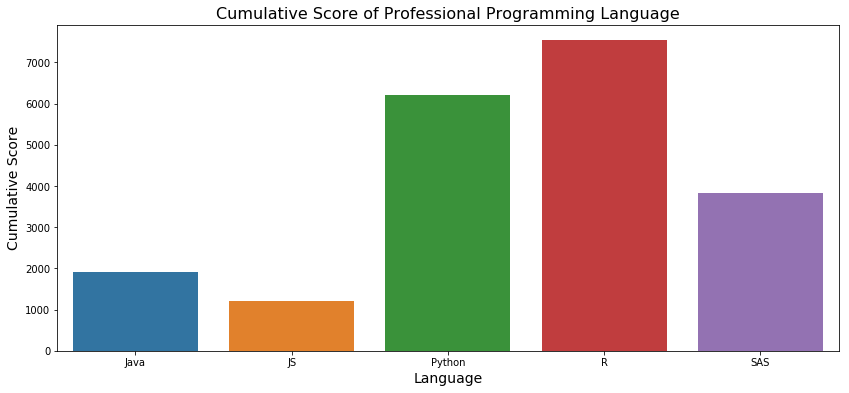

In [27]:
# Cumulative Bar Chart of Professional

professional = professional.rename(columns = lambda x : str(x)[5:])
prof = professional.sum()

plt.figure(figsize=(14, 6))
plt.xlabel("Language", fontsize=14)
plt.ylabel("Cumulative Score", fontsize=14)
plt.title("Cumulative Score of Professional Programming Language", fontsize=16)

sns.barplot(x=professional.columns, y=prof)

plt.savefig('Professional_Need_Score.pdf')

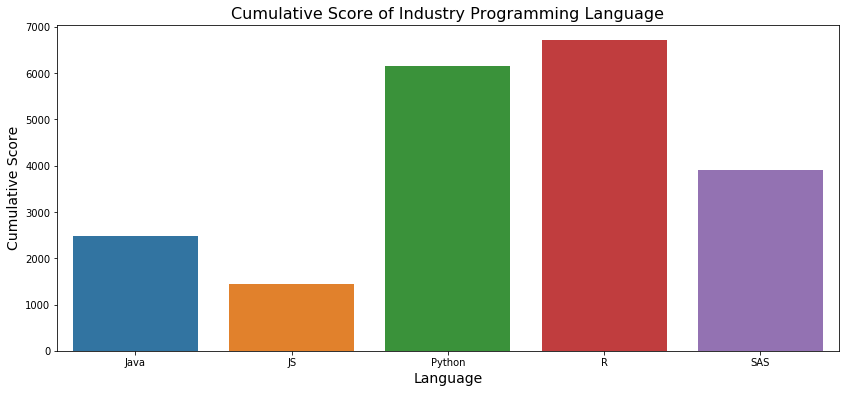

In [28]:
# Cumulative Bar Chart of Industry

industry = industry.rename(columns = lambda x : str(x)[4:])
ind = industry.sum()

plt.figure(figsize=(14, 6))
plt.xlabel("Language", fontsize=14)
plt.ylabel("Cumulative Score", fontsize=14)
plt.title("Cumulative Score of Industry Programming Language", fontsize=16)
sns.barplot(x=industry.columns, y=ind)

plt.savefig('Industry_Prevalence_Score.pdf')

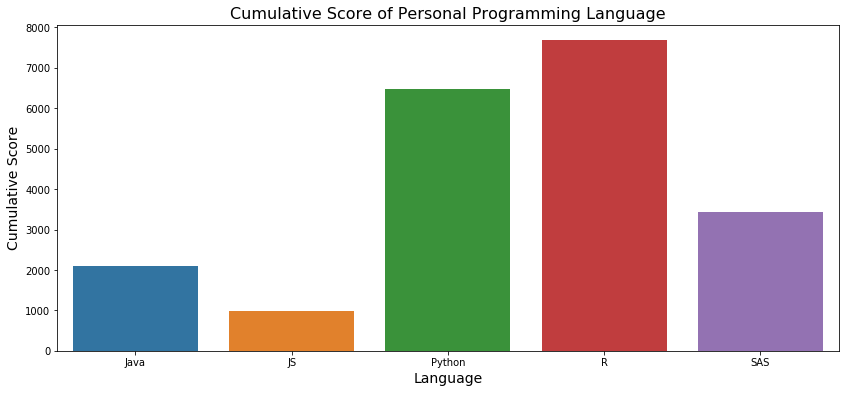

In [29]:
# Cumulative Bar Chart of Personal

personal = personal.rename(columns = lambda x : str(x)[3:])
my = personal.sum()

plt.figure(figsize=(14, 6))
plt.xlabel("Language", fontsize=14)
plt.ylabel("Cumulative Score", fontsize=14)
plt.title("Cumulative Score of Personal Programming Language", fontsize=16)
sns.barplot(x=personal.columns, y=my)

plt.savefig('Personal_Preference_Score.pdf')

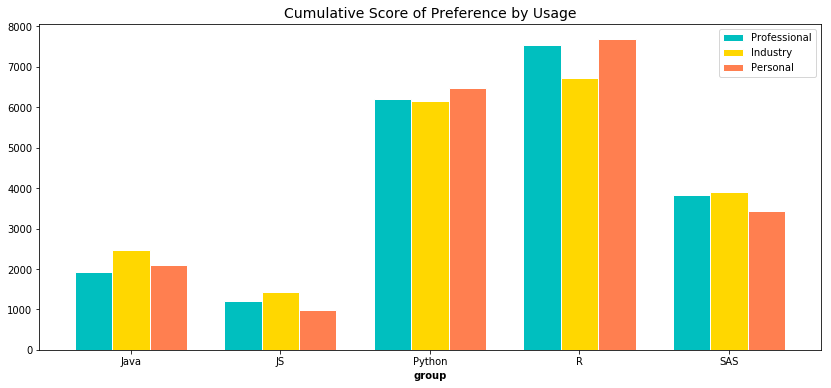

<Figure size 432x288 with 0 Axes>

In [30]:
# All Three Bar Charts Combined for ease of view

bars1 = prof
bars2 = ind
bars3 = my

# set sizes
plt.figure(figsize=(14, 6))
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='c', width=barWidth, edgecolor='white', label='Professional')
plt.bar(r2, bars2, color='gold', width=barWidth, edgecolor='white', label='Industry')
plt.bar(r3, bars3, color='coral', width=barWidth, edgecolor='white', label='Personal')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Java', 'JS', 'Python', 'R', 'SAS'])
 
# Create legend & Show graphic
plt.title('Cumulative Score of Preference by Usage', fontsize=14)
plt.legend()
plt.show()

plt.savefig('Total_Preference_Score.pdf')

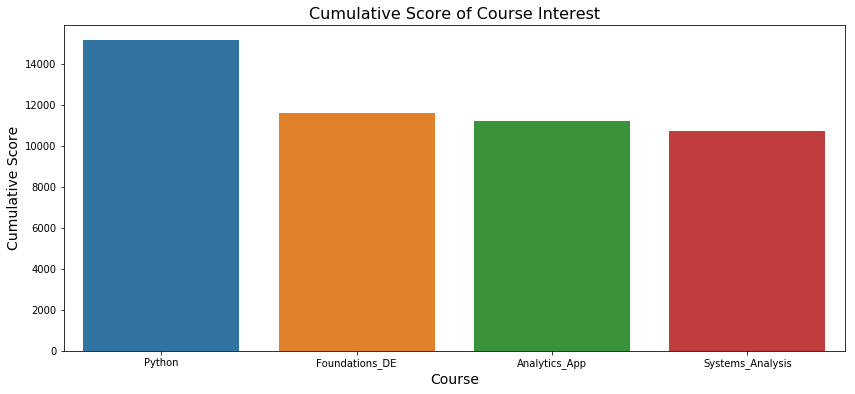

In [31]:
# Course Interest - Cumulative Bar Chart

interest = survey_df.filter(like='Course_Interest')
interest.columns = [col.replace('_Course_Interest', '') for col in interest.columns]

interestsum = interest.sum()

plt.figure(figsize=(14, 6))
plt.xlabel("Course", fontsize=14)
plt.ylabel("Cumulative Score", fontsize=14)
plt.title("Cumulative Score of Course Interest", fontsize=16)
sns.barplot(x=interest.columns, y=interestsum)

plt.savefig('Course_Int_Score.pdf')

In [32]:
# Most Popular Courses - Mode
interest.columns = [col.replace('_Course_Interest', '') for col in interest.columns]

print("Average % of Course Interest by Course: ---------------\n{}".format(interest.mean()))

Average % of Course Interest by Course: ---------------
Python              73.529126
Foundations_DE      58.045000
Analytics_App       55.201970
Systems_Analysis    53.630000
dtype: float64


In [33]:
# Descriptive Statistics of those who completed over half of the program (>6 courses)

completedsix = survey_df[survey_df['Courses_Completed'] > 6]

completed = print('\nDescriptive statistics those who completed over half of the program ---------------')
print(completedsix['Courses_Completed'].describe())



Descriptive statistics those who completed over half of the program ---------------
count    90.000000
mean      9.144444
std       1.706308
min       7.000000
25%       7.000000
50%       9.000000
75%      10.000000
max      12.000000
Name: Courses_Completed, dtype: float64


In [34]:
# Descriptive Statistics of those who hasn't completed half of the program (<6 courses)

notcompletedsix = survey_df[survey_df['Courses_Completed'] <= 6]

notcompleted = print('\nDescriptive statistics of who has not completed half of the program ---------------')
print(notcompletedsix['Courses_Completed'].describe())



Descriptive statistics of who has not completed half of the program ---------------
count    97.000000
mean      3.742268
std       1.609078
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       6.000000
Name: Courses_Completed, dtype: float64


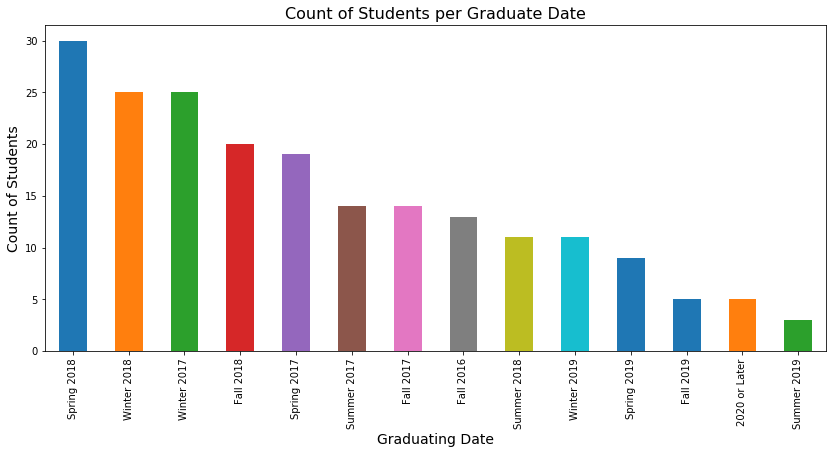

In [35]:
# Largest Amount of Students that took the Survey by Graduation Class - Mode

classsize = survey_df['Graduate_Date'].value_counts()

plt.figure(figsize=(14, 6))
plt.xlabel("Graduating Date", fontsize=14)
plt.ylabel("Count of Students", fontsize=14)
plt.title("Count of Students per Graduate Date", fontsize=16)

classsize.plot.bar()
plt.savefig('Count_Of_Students_by_grad_date.pdf')

# Conclusion

A MSPA Software Survey was collected in December 2016 and it was given to graduate students within the MSPA program. Data from the survey was used to help with the data science program curriculum planning.

Among survey takers, it seems like there was a good mix of students, almost equally for those halfway through the program (>6 courses) and those not yet completed more than half of the program (<6 courses). The majority of the students that took the survey were from the more immediate graduating classes, with the majority of them graduating in Spring 2018.

The survey asked of exposure and usage for software languages between the three categories: Professional, Industry, and Personal. Across all three categories, R was the predominant preferred language, with Python closely following second, and JS, HTML, and CSS used the least.

In terms of Course Interest, there were four options to decide from 0-100 for each in terms of interest. The four options were Python, Foundations DE, Analytics App, and Systems Analysis. Python had the highest percentage of course interest with 73.5%, followed by Foundations DE (58.0%), Analytics App (55.2%), and Systems Analysis (53.6%).

My recommendation would be to implement more coursework into the program that uses Python. Not only is Python a course and personal interest, but data shows that usage of Python is high for the industry and professional segments. With approximately half of the survey takers not having completed half of the program, interest in Python is not fleeting and it may be possible to implement more Python in the program, and possibly parallel courses in R if the budget and enough interest allows. If debating between Python or R for program usage, an additional survey can be sent out for survey takers to indicate a sillowed preference.